<a href="https://colab.research.google.com/github/mehaase/w266-final-project/blob/main/DATASCI266_Load_Data_and_Baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load and clean data


In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv(
    "https://github.com/t-davidson/hate-speech-and-offensive-language/raw/master/data/labeled_data.csv",
    index_col=0
)

From [the paper](https://ojs.aaai.org/index.php/ICWSM/article/view/14955/14805):

> What constitutes hate speech and when does it differ fromoffensive language? No formal definition exists but there isa consensus that it is speech that targets disadvantaged so-cial groups in a manner that is potentially harmful to them(Jacobs and Potter 2000; Walker 1994).
>
>...
>
>Drawing upon these definitions, we define hate speechaslanguage that is used to expresses hatred towards a tar-geted group or is intended to be derogatory, to humiliate,or to insult the members of the group. In extreme cases thismay also be language that threatens or incites violence, butlimiting our definition only to such cases would exclude alarge proportion of hate speech. Importantly, our definitiondoes not include all instances of offensive language becausepeople often use terms that are highly offensive to certaingroups but in a qualitatively different manner. For examplesome African Americans often use the termn*gga2in every-day language online (Warner and Hirschberg 2012), peopleuse terms likeh*eandb*tchwhen quoting rap lyrics, andteenagers use homophobic slurs likef*gas they play videogames. Such language is prevalent on social media (Wanget al. 2014), making this boundary condition crucial for anyusable hate speech detection system .

`count`: number of CrowdFlower users who coded each tweet (min is 3, sometimes more users coded a tweet when judgments were determined to be unreliable by CF).

`hate_speech`: number of CF users who judged the tweet to be hate speech.

`offensive_language`: number of CF users who judged the tweet to be offensive.

`neither`: number of CF users who judged the tweet to be neither offensive nor non-offensive.

`class`: class label for majority of CF users. 0 - hate speech 1 - offensive language 2 - neither

In [3]:
df.describe()

,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,3.243473,0.280515,2.413711,0.549247,1.110277
std,0.883060,0.631851,1.399459,1.113299,0.462089
min,3.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,2.000000,0.000000,1.000000
50%,3.000000,0.000000,3.000000,0.000000,1.000000
75%,3.000000,0.000000,3.000000,0.000000,1.000000
max,9.000000,7.000000,9.000000,9.000000,2.000000


In [13]:
df

,count,hate_speech,offensive_language,neither,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...
25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
25295,6,0,6,0,1,youu got wild bitches tellin you lies


Offensive Speech    19190
Neither              4163
Hate Speech          1430
Name: class, dtype: int64

Offensive Speech    19190
Neither              4163
Hate Speech          1430
Name: class, dtype: int64

(array([0, 1, 2]),
 [Text(0, 0, 'Offensive Speech'),
  Text(1, 0, 'Neither'),
  Text(2, 0, 'Hate Speech')])

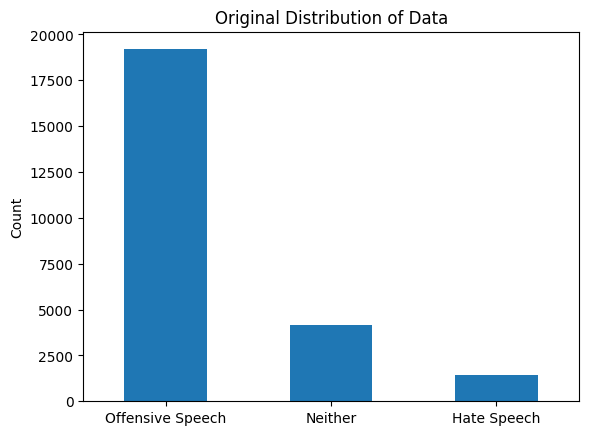

In [33]:
counts = df["class"].map({0: "Hate Speech", 1: "Offensive Speech", 2: "Neither"}).value_counts()
display(counts)
counts.plot.bar(x="class", y="count")
plt.title("Original Distribution of Data")
plt.ylabel("Count")
plt.xticks(rotation=0)

In [35]:
# Encode hate_speech and offensive_language as the ratio of proportion of coders who labeled it that way.
df_ratio = df.copy()
df_ratio["hate_speech"] = df_ratio["hate_speech"] / df["count"]
df_ratio["offensive_language"] = df_ratio["offensive_language"] / df["count"]
df_ratio["neither"] = df_ratio["neither"] / df["count"]
df_ratio["tweet"] = df_ratio["tweet"].str.replace("@[_A-Za-z0-9]+", "AT_MENTION", regex=True)
df_ratio

,count,hate_speech,offensive_language,neither,class,tweet
0,3,0.0,0.000000,1.000000,2,!!! RT AT_MENTION: As a woman you shouldn't co...
1,3,0.0,1.000000,0.000000,1,!!!!! RT AT_MENTION: boy dats cold...tyga dwn ...
2,3,0.0,1.000000,0.000000,1,!!!!!!! RT AT_MENTION Dawg!!!! RT AT_MENTION: ...
3,3,0.0,0.666667,0.333333,1,!!!!!!!!! RT AT_MENTION: AT_MENTION she look l...
4,6,0.0,1.000000,0.000000,1,!!!!!!!!!!!!! RT AT_MENTION: The shit you hear...
...,...,...,...,...,...,...
25291,3,0.0,0.666667,0.333333,1,you's a muthaf***in lie &#8220;AT_MENTION: AT_...
25292,3,0.0,0.333333,0.666667,2,"you've gone and broke the wrong heart baby, an..."
25294,3,0.0,1.000000,0.000000,1,young buck wanna eat!!.. dat nigguh like I ain...
25295,6,0.0,1.000000,0.000000,1,youu got wild bitches tellin you lies


In [36]:
# Downsample so that classes 1/2 (offensive_language and neither) have the same count as class 0 (hate_speech).
def downsample(df):
  hatespeech_df = df[df["class"] == 0]
  hatespeech_count = hatespeech_df["class"].count()
  target_count = hatespeech_count // 2
  print(f"We have {hatespeech_count:} hatespeech labels.")
  print(f"Going to sample {target_count} offensive labels and {target_count} neither labels...")
  offensive_df = df[df["class"] == 1].sample(target_count, random_state=20230711)
  neither_df = df[df["class"] == 2].sample(target_count, random_state=20230711)
  df2 = pd.concat([neither_df, offensive_df, hatespeech_df])
  df2["is_hatespeech"] = df2["class"] == 0
  # Shuffle and reset index:
  df2 = df2.sample(frac=1).reset_index(drop=True)
  return df2

In [37]:
df_downsample = downsample(df_ratio)

We have 1430 hatespeech labels.
Going to sample 715 offensive labels and 715 neither labels...


In [38]:
df_downsample

,count,hate_speech,offensive_language,neither,class,tweet,is_hatespeech
0,3,0.000000,0.000000,1.0,2,One of the world's most prominent Jihadi forum...,False
1,3,0.000000,0.000000,1.0,2,WEBBERS! RT AT_MENTION: Sz13 vnds restorers dr...,False
2,3,0.000000,1.000000,0.0,1,Bouta Rasengan all these stupid bitches,False
3,3,0.000000,1.000000,0.0,1,"Your pussy hole must be small ""AT_MENTION: the...",False
4,3,1.000000,0.000000,0.0,0,Somebody please choke that fucking retard that...,True
...,...,...,...,...,...,...,...
2855,3,0.666667,0.333333,0.0,0,Al noooo ...... Too late fuckin faggot ! Lmao,True
2856,3,0.000000,1.000000,0.0,1,RT AT_MENTION: *claims hoes don't exist* \n\n*...,False
2857,3,0.666667,0.333333,0.0,0,AT_MENTION Niggas probably be watching me like...,True
2858,3,0.333333,0.666667,0.0,1,AT_MENTION pussy,False


is_hatespeech
False    1430
True     1430
Name: is_hatespeech, dtype: int64

(array([0, 1]), [Text(0, 0, 'False'), Text(1, 0, 'True')])

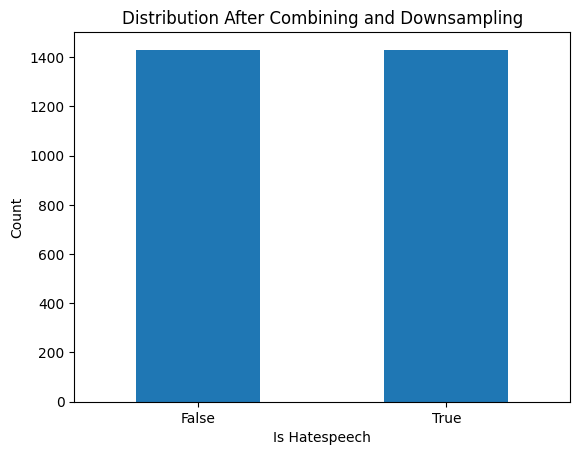

In [40]:
counts = df_downsample.groupby("is_hatespeech")["is_hatespeech"].count()
display(counts)
counts.plot.bar(x="is_hatespeech", y="count")
plt.title("Distribution After Combining and Downsampling")
plt.ylabel("Count")
plt.xlabel("Is Hatespeech")
plt.xticks(rotation=0)

In [ ]:
# Create and 80/20 train-test split
test_df = df_downsample.sample(frac = 0.2)
train_df = df_downsample.drop(test_df.index)
print(f"train_df: {len(train_df):,} rows")
print(f"test_df:  {len(test_df):,} rows")

train_df: 2,288 rows
test_df:  572 rows


In [ ]:
from google.colab import drive
drive.mount('/mnt/gdrive')

MessageError: ignored

Go to "Shared With Me", right click the W266 Project Folder, select "Add Shortcut to Drive", then add it to "My Drive". Then you should be able to see the project directory mounted in your notebook.

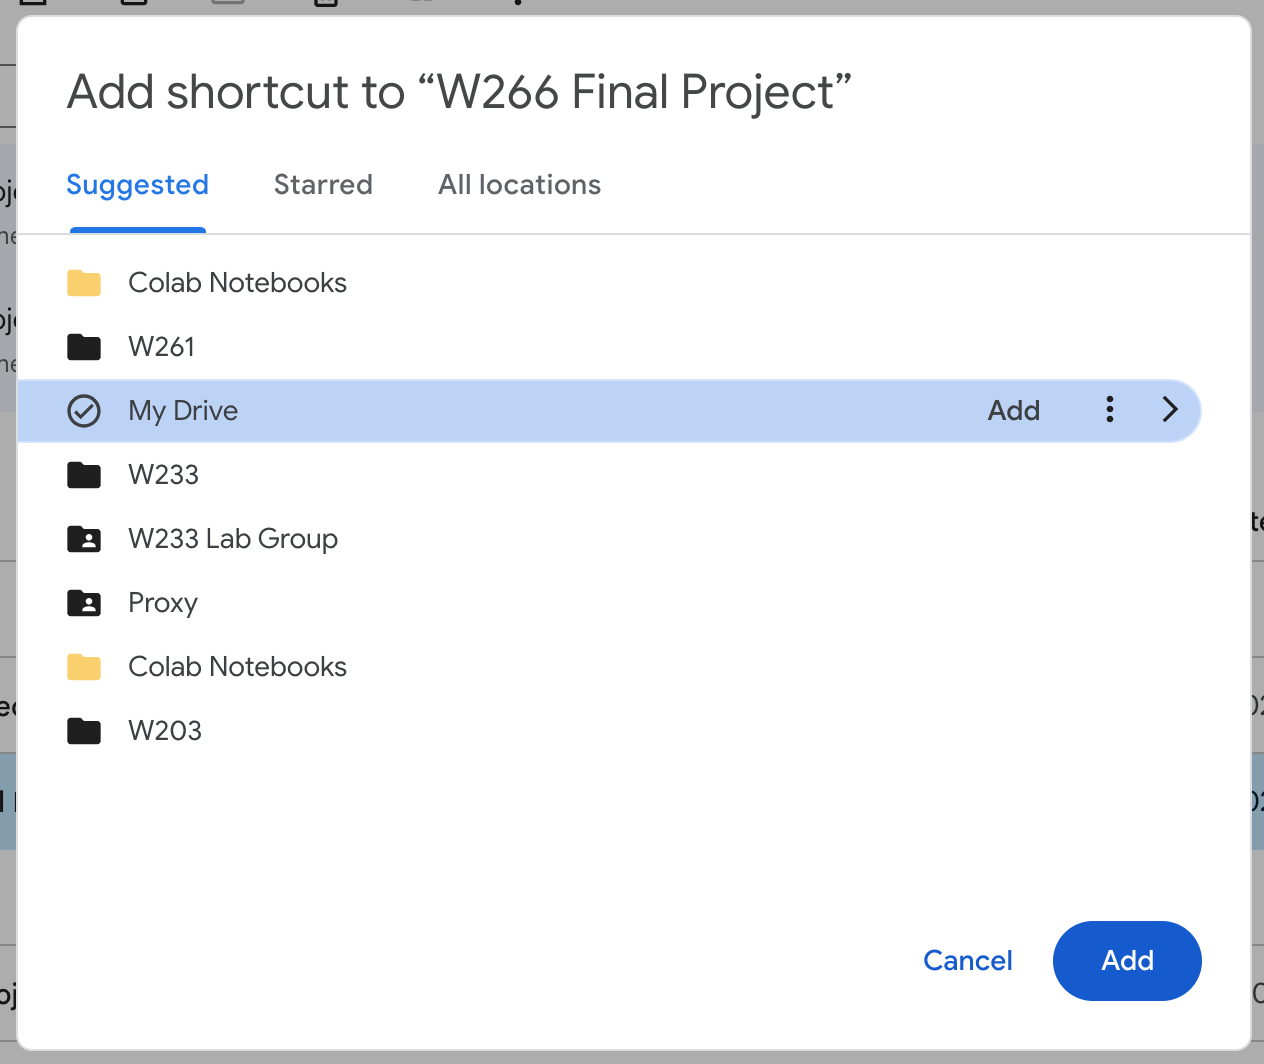

In [ ]:
project_dir = "/mnt/gdrive/MyDrive/W266 Final Project"

In [ ]:
!ls "{project_dir}"

 test_df.csv   'W266 Project Proposal.gdoc'
 train_df.csv  'W266 Project Proposal Working Copy.gdoc'


In [ ]:
train_df.to_csv(f"{project_dir}/train_df.csv")
test_df.to_csv(f"{project_dir}/test_df.csv")

In [ ]:
# To read data back in:
from google.colab import drive
import pandas as pd

drive.mount('/mnt/gdrive')
project_dir = "/mnt/gdrive/MyDrive/W266 Final Project"
train_df = pd.read_csv(f"{project_dir}/train_df.csv", index_col=0)
test_df = pd.read_csv(f"{project_dir}/test_df.csv", index_col=0)

Mounted at /mnt/gdrive


In [ ]:
train_df.describe()

,count,hate_speech,offensive_language,neither,class
count,2288.000000,2288.000000,2288.000000,2288.000000,2288.000000
mean,3.147290,0.381748,0.370813,0.247438,0.755245
std,0.709534,0.365721,0.352851,0.391734,0.830901
min,3.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,0.333333,0.333333,0.000000,1.000000
75%,3.000000,0.666667,0.500000,0.666667,2.000000
max,9.000000,1.000000,1.000000,1.000000,2.000000


In [ ]:
test_df.describe()

,count,hate_speech,offensive_language,neither,class
count,572.000000,572.000000,572.000000,572.000000,572.000000
mean,3.194056,0.369561,0.381362,0.249077,0.765734
std,0.832210,0.362199,0.355879,0.394766,0.831314
min,3.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,0.333333,0.333333,0.000000,1.000000
75%,3.000000,0.666667,0.666667,0.666667,2.000000
max,9.000000,1.000000,1.000000,1.000000,2.000000


# EDA (Training Dataset Only)
- Most frequent words per class
- Histogram of the length of the tweet per class

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import re
from collections import Counter

In [ ]:
def tweets_to_wordcounts(df, col_name):
  """Takes a text dataframe column and produces a list of words with their respective frequency.
     df = dataframe
     col_name = column name of interest
     train_tweets_counts_df_limited = dataframe consisting of a word and its corresponding count"""

  #Convert the column of tweets text into a list of entries
  tweets = pd.Series(df[col_name]).tolist()

  #Separate each word from the list of tweets and append to tweets_words
  tweets_words = []
  for tweet in tweets:
    for phrase in re.split('; |, |\*|\n',tweet):
      for word in phrase.split(" "):
        tweets_words.append("".join(ch for ch in word if ch.isalnum()))

  #Create a dataframe with each word and its corresponding count value
  tweets_counts = Counter(tweets_words).most_common()
  train_tweets_counts_df = pd.DataFrame(tweets_counts, columns = ["word","count"])
  train_tweets_counts_df['word'].replace('', np.nan, inplace=True)
  train_tweets_counts_df.dropna(subset=['word'], inplace=True)
  train_tweets_counts_df = train_tweets_counts_df[train_tweets_counts_df['word'].str.contains('ATMENTION')==False]
  train_tweets_counts_df = train_tweets_counts_df[train_tweets_counts_df['word'].str.contains('RT')==False]
  train_tweets_counts_df_limited = train_tweets_counts_df[train_tweets_counts_df['count'] > 50]

  return train_tweets_counts_df_limited

In [ ]:
#Create new dataframes split by class
train_is_hatespeech = train_df[train_df['is_hatespeech'] == True]
train_is_not_hatespeech = train_df[train_df['is_hatespeech'] == False]

#Get counts for words by class
train_is_hatespeech_words = tweets_to_wordcounts(train_is_hatespeech,'tweet')
train_is_not_hatespeech_words = tweets_to_wordcounts(train_is_not_hatespeech,'tweet')

In [ ]:
#Show words that are frequently seen in is_hateful tweets but not in not_hateful tweets
df_all = train_is_hatespeech_words.merge(train_is_not_hatespeech_words.drop_duplicates(), on=['word'],
                   how='left', indicator=True)
df_all[df_all['_merge'] == 'left_only']['word']

8      faggot
13      nigga
14        ass
19      white
22     nigger
24          u
26       fuck
30        fag
33    fucking
34       they
36         so
39       have
40     niggas
Name: word, dtype: object

<Axes: title={'center': 'Training Dataset Word Frequencies Greater than 50 for Hateful Speech Class'}, xlabel='Word', ylabel='Frequency'>

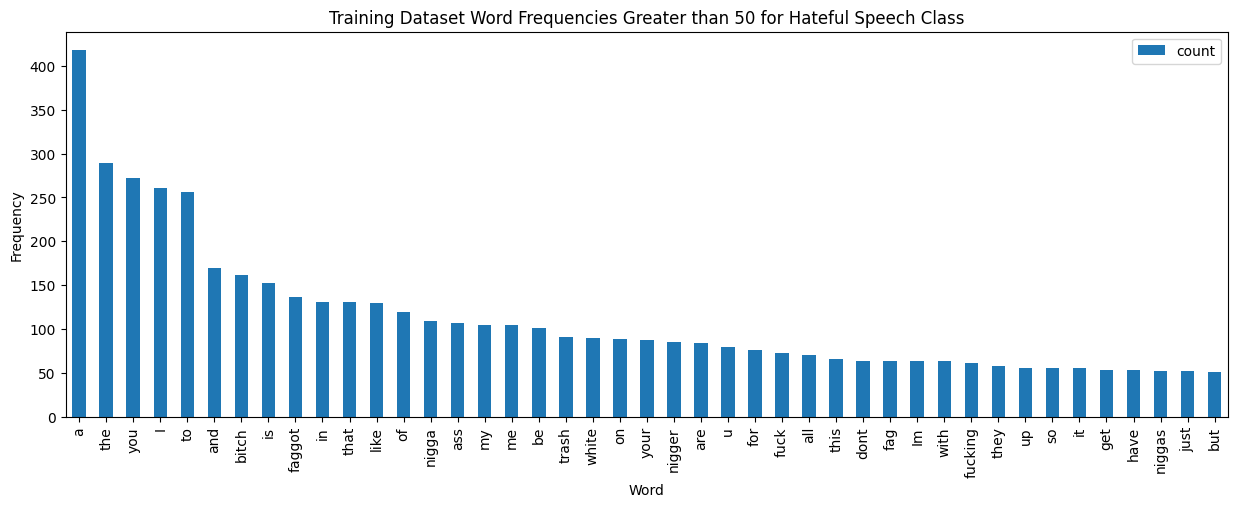

In [ ]:
train_is_hatespeech_words.plot.bar(x = 'word', y = 'count',
                                        figsize=(15, 5),
                                        title = 'Training Dataset Word Frequencies Greater than 50 for Hateful Speech Class',
                                        xlabel = 'Word',
                                        ylabel = 'Frequency')

<Axes: title={'center': 'Training Dataset Word Frequencies Greater than 50 for Non-Hateful Speech Class'}, xlabel='Word', ylabel='Frequency'>

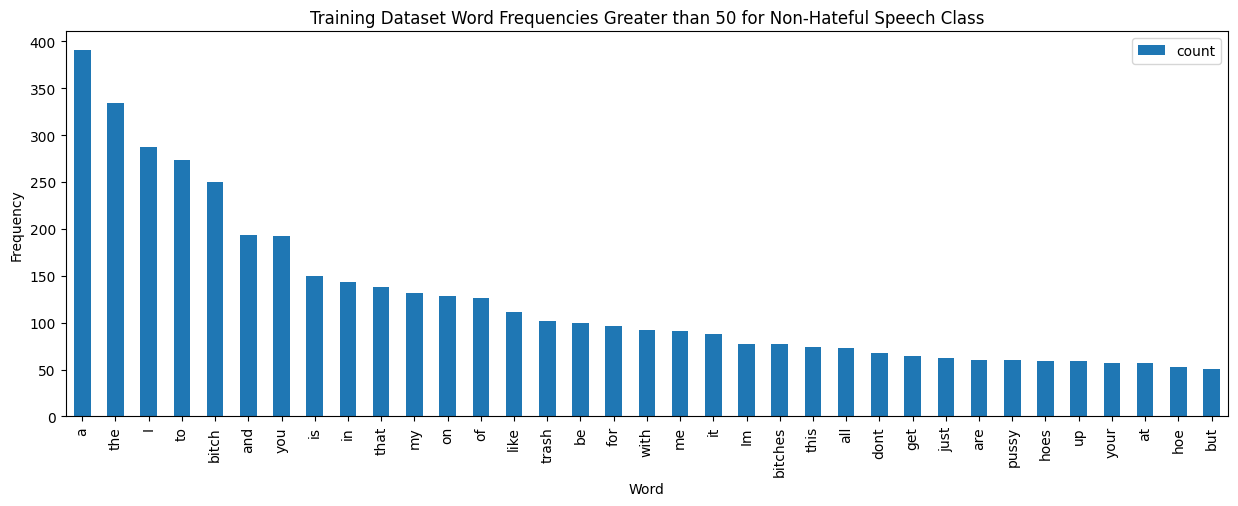

In [ ]:
train_is_not_hatespeech_words.plot.bar(x = 'word', y = 'count',
                                        figsize=(15, 5),
                                        title = 'Training Dataset Word Frequencies Greater than 50 for Non-Hateful Speech Class',
                                        xlabel = 'Word',
                                        ylabel = 'Frequency')

In [ ]:
def tweets_lengths(df, col_name):
  """Takes a text dataframe column and produces a list of words.
     df = dataframe
     col_name = column name of interest
     train_tweets_counts_df_limited = dataframe consisting of a word and its corresponding count"""

  #Convert the column of tweets text into a list of entries
  tweets = pd.Series(df[col_name]).tolist()

  #Separate each word from the list of tweets and append to tweets_words
  tweets_lengths = []
  for tweet in tweets:
    for phrase in re.split('; |\*|\n',tweet):
      tweets_lengths.append(len(phrase))

  return tweets_lengths

In [ ]:
#Get tweet lengths by class
train_is_hatespeech_lengths = tweets_lengths(train_is_hatespeech,'tweet')
train_is_not_hatespeech_lengths = tweets_lengths(train_is_not_hatespeech,'tweet')

Text(0, 0.5, 'Frequency')

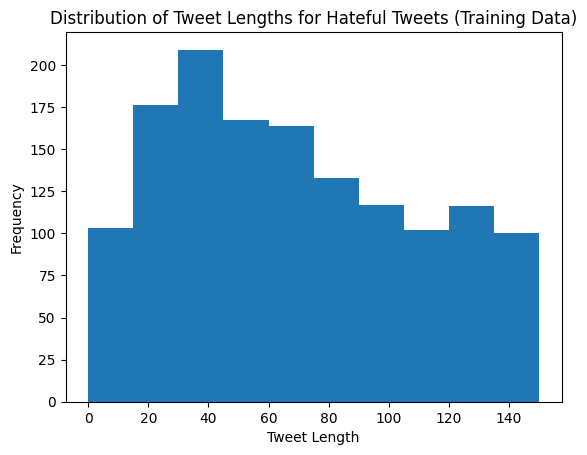

In [ ]:
plt.hist(train_is_hatespeech_lengths, range = [0,150])
plt.title('Distribution of Tweet Lengths for Hateful Tweets (Training Data)')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

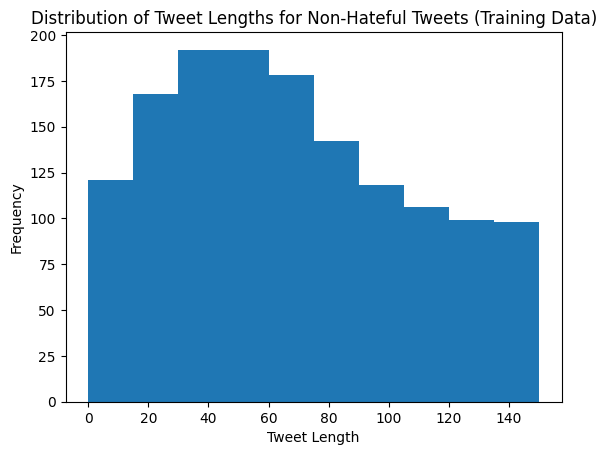

In [ ]:
plt.hist(train_is_not_hatespeech_lengths, range = [0,150])
plt.title('Distribution of Tweet Lengths for Non-Hateful Tweets (Training Data)')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')


 # Random Forest Basline Model

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

In [ ]:
#Embed tweet text and save as X_train, X_test
X_train = pd.Series(train_df.iloc[: , -2])
vectorizer = CountVectorizer(min_df=1)
X_train = vectorizer.fit_transform(X_train).toarray()

X_test = pd.Series(test_df.iloc[: , -2])
X_test = vectorizer.transform(X_test).toarray()

#Split train and test labels and convert to boolean
Y_train = pd.Series(train_df.iloc[: , -1].astype(int))

Y_test = pd.Series(test_df.iloc[: , -1].astype(int))

In [ ]:
X_train.shape

(2288, 5798)

In [ ]:
def rf_model(X_train, Y_train):
  """
      Function for a baseline random forest model using default hyperparameters.
        Inputs
        X_train = embedded tweets
        Y_train = labels
        Output
        rf = trained random forest model

  """
  rf = RandomForestClassifier()
  rf.fit(X_train, Y_train)

  return rf


In [ ]:
clf = rf_model(X_train, Y_train)

In [ ]:
rf_pred = clf.predict(X_train)
accuracy = accuracy_score(Y_train, rf_pred)
print("Train Accuracy:", accuracy)

rf_pred = clf.predict(X_test)
accuracy = accuracy_score(Y_test, rf_pred)
print("Test Accuracy :", accuracy)

print("\nTest metrics:")
precision, recall, f1, support = precision_recall_fscore_support(
    Y_test, rf_pred, average='binary')
print(f"Precision: {precision:0.4f}")
print(f"Recall:    {recall:0.4f}")
print(f"F1 Score:  {f1:00.4f}")

Train Accuracy: 0.9995629370629371
Test Accuracy : 0.791958041958042

Test metrics:
Precision: 0.8108
Recall:    0.7500
F1 Score:  0.7792


In [ ]:
imp = list(zip(vectorizer.get_feature_names_out(), clf.feature_importances_))
imp.sort(key=lambda x: x[1], reverse=True)
print("most important features:")
display(imp[:20])
print("least important features")
display(imp[-20:])

most important features:


[('faggot', 0.03172652641820142),
 ('nigger', 0.01777430398443403),
 ('white', 0.016338025160155353),
 ('at_mention', 0.01444904002609363),
 ('fag', 0.01314027766296475),
 ('bitch', 0.01187958987154033),
 ('niggers', 0.01173839311872536),
 ('faggots', 0.010591818279115922),
 ('nigga', 0.009713422970827446),
 ('you', 0.008712746096058092),
 ('rt', 0.008672963657338573),
 ('niggas', 0.008059520177513362),
 ('bird', 0.007722746131933258),
 ('ass', 0.007490034476440823),
 ('fucking', 0.007357778450464842),
 ('the', 0.006449737959527675),
 ('charlie', 0.005971665284273087),
 ('fuck', 0.005628333916051166),
 ('trash', 0.005521595295848154),
 ('fags', 0.005189875508018305)]

least important features


[('trolls', 0.0),
 ('trouble', 0.0),
 ('turkey', 0.0),
 ('uhhh', 0.0),
 ('undermines', 0.0),
 ('unsuspecting', 0.0),
 ('uvjgbcpcbu', 0.0),
 ('validation', 0.0),
 ('viacom', 0.0),
 ('victimized', 0.0),
 ('waverly', 0.0),
 ('wax', 0.0),
 ('whining', 0.0),
 ('wins', 0.0),
 ('wishing', 0.0),
 ('wv', 0.0),
 ('xzzfdolzdn', 0.0),
 ('yapping', 0.0),
 ('zoals', 0.0),
 ('zoe', 0.0)]

# Experiment: Masking usernames

Test whether usernames are correlated with hate speech, i.e. if the same username appears in both train and test and that could leak data.

In [ ]:
train_df2 = train_df.copy()
train_df2.tweet = train_df2.tweet.str.replace("@[_A-Za-z0-9]+", "AT_MENTION", regex=True)
train_df2

,count,hate_speech,offensive_language,neither,class,tweet,is_hatespeech
0,3,0.000000,1.000000,0.000000,1,RT AT_MENTION: I think most men cheat because ...,False
1,6,0.000000,0.000000,1.000000,2,RT AT_MENTION: Charlie Sheen is a legend #ForT...,False
4,3,0.333333,0.000000,0.666667,2,diet coke trash,False
6,6,0.000000,1.000000,0.000000,1,I need a bitch to top me till I get sleepy &#1...,False
7,3,0.000000,0.333333,0.666667,2,Sorry all my fellow negros,False
...,...,...,...,...,...,...,...
2855,3,1.000000,0.000000,0.000000,0,AT_MENTION you a fatherless wallet carrying as...,True
2856,3,0.666667,0.333333,0.000000,0,"SIR. PLEASE go text your Mexican bitch, becaus...",True
2857,3,1.000000,0.000000,0.000000,0,"""AT_MENTION: AT_MENTION alsarabsss"" hes a bean...",True
2858,3,0.666667,0.333333,0.000000,0,RT AT_MENTION: Look at u now u pregnant stupid...,True


In [ ]:
test_df2 = test_df.copy()
test_df2.tweet = test_df2.tweet.str.replace("@[_A-Za-z0-9]+", "AT_MENTION", regex=True)
test_df2

,count,hate_speech,offensive_language,neither,class,tweet,is_hatespeech
505,3,0.000000,1.000000,0.0,1,Put that on everything I love. Ain't no ugly b...,False
1059,3,0.000000,0.000000,1.0,2,I used to chug vodka and orange juice. I also ...,False
80,3,1.000000,0.000000,0.0,0,Members of non-traditional religions are all s...,True
1308,3,0.000000,1.000000,0.0,1,RT AT_MENTION: Hahaha these niggas funny ask&#...,False
694,3,0.666667,0.333333,0.0,0,"RT AT_MENTION: ""AT_MENTION: ----&gt; tragedy s...",True
...,...,...,...,...,...,...,...
1810,9,0.555556,0.444444,0.0,0,"bitch kill yoself, go on to the bathroom and e...",True
1776,3,0.666667,0.333333,0.0,0,You a real life faggot if you ever fight anoth...,True
647,3,0.666667,0.333333,0.0,0,AT_MENTION AT_MENTION AT_MENTION you fuckin Ya...,True
2482,3,1.000000,0.000000,0.0,0,Chill RT AT_MENTION If I ever become president...,True


In [ ]:
#Embed tweet text and save as X_train, X_test
X_train2 = pd.Series(train_df2.iloc[: , -2])
vectorizer2 = CountVectorizer(min_df=1)
X_train2 = vectorizer2.fit_transform(X_train2).toarray()

X_test2 = pd.Series(test_df2.iloc[: , -2])
X_test2 = vectorizer2.transform(X_test2).toarray()

#Split train and test labels and convert to boolean
Y_train2 = pd.Series(train_df2.iloc[: , -1].astype(int))
Y_test2 = pd.Series(test_df2.iloc[: , -1].astype(int))

In [ ]:
clf2 = rf_model(X_train2, Y_train2)

In [ ]:
X_train2.shape

(2288, 5792)

In [ ]:
print("Train Accuracy:", accuracy_score(Y_train2, clf2.predict(X_train2)))
print("Test Accuracy :", accuracy_score(Y_test2, clf2.predict(X_test2)))

Train Accuracy: 0.9995629370629371
Test Accuracy : 0.7972027972027972


In [ ]:
imp = list(zip(vectorizer.get_feature_names_out(), clf.feature_importances_))
imp.sort(key=lambda x: x[1], reverse=True)
print("most important features:")
display(imp[:20])
print("least important features")
display(imp[-20:])

most important features:


[('faggot', 0.033278894096093053),
 ('nigger', 0.020314865154070497),
 ('white', 0.020168947119359383),
 ('fag', 0.014688948113617938),
 ('faggots', 0.011744964142375254),
 ('bitch', 0.010545929800702923),
 ('niggers', 0.009828091889192273),
 ('bird', 0.007710157292711746),
 ('nigga', 0.007698734241226054),
 ('you', 0.0076636397191726),
 ('ass', 0.007026890251697372),
 ('fuck', 0.006991354487006417),
 ('rt', 0.0066244210897903255),
 ('fags', 0.006478717702054795),
 ('niggas', 0.005962284990164145),
 ('charlie', 0.005941371072320535),
 ('dyke', 0.005939796269689399),
 ('fucking', 0.0058596857398385185),
 ('the', 0.005419711945887531),
 ('trash', 0.005011634953912127)]

least important features


[('woody', 0.0),
 ('wordpressdotcom', 0.0),
 ('worldstarfunny', 0.0),
 ('worm', 0.0),
 ('worth', 0.0),
 ('wr', 0.0),
 ('wrenching', 0.0),
 ('wtl', 0.0),
 ('wuz', 0.0),
 ('wwsinej', 0.0),
 ('wyeisha_davis', 0.0),
 ('x3bwnm3jii', 0.0),
 ('xx', 0.0),
 ('xzzfdolzdn', 0.0),
 ('y3jyj2yf4l', 0.0),
 ('yaga', 0.0),
 ('yonifreedhoff', 0.0),
 ('zionist', 0.0),
 ('zj1mk6w7ef', 0.0),
 ('zooyorkinit', 0.0)]

Conclusion: masking usernames has a very small but positive improvement on performance.